<a href="https://colab.research.google.com/github/RedsAnalysis/Neural-network-on-paper-from-scratch-/blob/main/NN_on_Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [ ]:
data1 = pd.read_csv("mnist_test.csv")
data2 = pd.read_csv("mnist_train.csv")

In [ ]:
data2.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_train = np.array(data2.T)
data_test = np.array(data1.T)




In [ ]:
data_train

array([[5, 0, 4, ..., 5, 6, 8],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
def split_features_labels(data):
  # Labels are in the first column
    y = data[:1:,::]
    # Features are all the other columns
    x = data[1::,::]
    return x, y


X_train, y_train = split_features_labels(data_train)
X_test, y_test = split_features_labels(data_test)

In [ ]:

X_train= X_train/ 255.0


In [ ]:
X_train.shape

(784, 60000)

In [ ]:
import numpy as np


def initialize_network(input_size, hidden_size1, hidden_size2, output_size):
    # Weights are initialized with small random values
    w1 = np.random.randn( input_size, hidden_size1) * np.sqrt(2 / input_size)
    w2 = np.random.randn( hidden_size1, hidden_size2)* np.sqrt(2 / hidden_size1)
    w3 = np.random.randn( hidden_size2, output_size)* np.sqrt(2 / hidden_size2)
    # Biases are initialized to zero
    b1 = np.zeros((hidden_size1,1))
    b2 = np.zeros((hidden_size2,1))
    b3 = np.zeros((output_size,1))

    return w1,b1,w2,b2,w3,b3

In [ ]:
w1,b1,w2,b2,w3,b3 = initialize_network(784,16,16,10)

In [ ]:
w3.shape

(16, 10)

In [ ]:
np.min(w3)

-0.7875319095318839

In [ ]:
y_train.shape

(1, 60000)

In [ ]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


In [ ]:
def forward_pass(X ,w1 ,b1 ,w2 ,b2 ,w3 ,b3 ):
    Z1 = w1.T.dot(X) + b1
    A1 = relu(Z1)


    #print("Z1",Z1.shape, "Range:", np.min(Z1), np.max(Z1))
    #print("A1:", A1.shape, "Range:", np.min(A1), np.max(A1), "\n")
    Z2 = w2.T.dot(A1) + b2
    A2 = relu(Z2)

    #print("Z2",Z2.shape, "Range:", np.min(Z2), np.max(Z2))
    #print("A2:", A2.shape, "Range:", np.min(A2), np.max(A2),"\n")

    Z3 = w3.T.dot(A2) + b3
    O = sigmoid(Z3)



    #print("Z3",Z3.shape, "Range:", np.min(Z3), np.max(Z3))
    #print("O:", O.shape, "Range:", np.min(O), np.max(O),"Sum:", np.sum(O),"\n")

    return  Z1, Z2, Z3, A1, A2, O

In [ ]:
#forward_pass(X1,w1,b1,w2,b2,w3,b3)

In [ ]:

def backprop(X, y ,w1,b1,w2,b2,w3,b3, A1, A2, O, Z1, Z2, Z3, learning_rate):

    y = one_hot(y)
    k = y.shape[1]
    #Loss or Cost Function
    C = (1/k)* (O - y)**2
    Cd =  (2/k)* (O - y)

    #print("C_d", np.min(C_d), np.max(C_d))


    # Output layer error
    dz3 = Cd * sigmoid_derivative(Z3)
    dw3 =  (A2.dot(dz3.T))
    db3 = np.sum(dz3)


    # Error for Hidden Layer 2
    dz2 = np.dot(w3,dz3) * relu_derivative(Z2)
    dw2 =  (A1.dot(dz2.T))
    db2 =  np.sum(dz2)


    # Error for Hidden Layer 1
    dz1 = np.dot(w2, dz2) * relu_derivative(Z1)
    dw1 =  X.dot(dz1.T)
    db1 =  np.sum(dz1)

    w3 = w3 - learning_rate * dw3
    b3 = b3 - learning_rate * db3

    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2

    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1

    return w1, b1, w2, b2, w3, b3





In [ ]:
def get_predictions(Output):
    return np.argmax(Output, 0)

def get_accuracy(predictions, Y):
    #print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [ ]:
def train(X, y, epochs, learning_rate):
    w1, b1, w2, b2, w3, b3 = initialize_network(input_size, hidden_size1, hidden_size2, output_size)
    for i in range(epochs):
        Z1, Z2, Z3,A1, A2, O = forward_pass(X ,w1 ,b1 ,w2 ,b2 ,w3 ,b3 )
        w1, b1, w2, b2, w3, b3 = backprop(X, y,w1,b1,w2,b2,w3,b3, A1, A2, O, Z1, Z2, Z3, learning_rate)


        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(O)
            print("accuracy: ", get_accuracy(predictions, y))
    return w1 ,b1 ,w2 ,b2 ,w3 ,b3

In [ ]:
input_size = 784  # for MNIST data, each image is 28x28 pixels
hidden_size1 = 16
hidden_size2 = 16
output_size = 10  # assuming a classification task with 10 classes
epochs = 750
# Initialize the network
initialize_network(input_size, hidden_size1, hidden_size2, output_size)

# Assuming X and y are already loaded and preprocessed
w1 ,b1 ,w2 ,b2 ,w3 ,b3 = train(X_train, y_train, epochs, learning_rate=0.1)


Iteration:  0
accuracy:  0.0753
Iteration:  10
accuracy:  0.1112
Iteration:  20
accuracy:  0.1586
Iteration:  30
accuracy:  0.1899
Iteration:  40
accuracy:  0.22693333333333332
Iteration:  50
accuracy:  0.27558333333333335
Iteration:  60
accuracy:  0.31693333333333334
Iteration:  70
accuracy:  0.3656
Iteration:  80
accuracy:  0.41651666666666665
Iteration:  90
accuracy:  0.45945
Iteration:  100
accuracy:  0.48463333333333336
Iteration:  110
accuracy:  0.49721666666666664
Iteration:  120
accuracy:  0.5046666666666667
Iteration:  130
accuracy:  0.5105166666666666
Iteration:  140
accuracy:  0.5167166666666667
Iteration:  150
accuracy:  0.5320333333333334
Iteration:  160
accuracy:  0.5587833333333333
Iteration:  170
accuracy:  0.58445
Iteration:  180
accuracy:  0.60425
Iteration:  190
accuracy:  0.6207333333333334
Iteration:  200
accuracy:  0.6350833333333333
Iteration:  210
accuracy:  0.6466333333333333
Iteration:  220
accuracy:  0.6566666666666666
Iteration:  230
accuracy:  0.66516666666

In [ ]:
def make_predictions(X ,w1 ,b1 ,w2 ,b2 ,w3 ,b3 ):
    A1, A2, O, Z1, Z2, Z3 = forward_pass(X ,w1 ,b1 ,w2 ,b2 ,w3 ,b3 )
    predictions = get_predictions(O)
    return predictions


def test_prediction(index, w1 ,b1 ,w2 ,b2 ,w3 ,b3 ):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], w1 ,b1 ,w2 ,b2 ,w3 ,b3 )
    label = y_train[:,index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  [0]


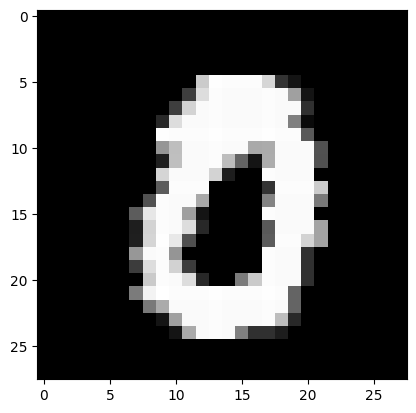

Prediction:  [0]
Label:  [0]


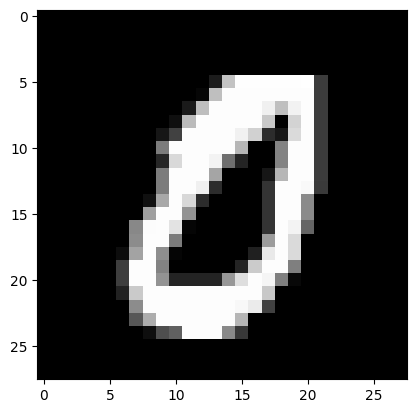

Prediction:  [1]
Label:  [7]


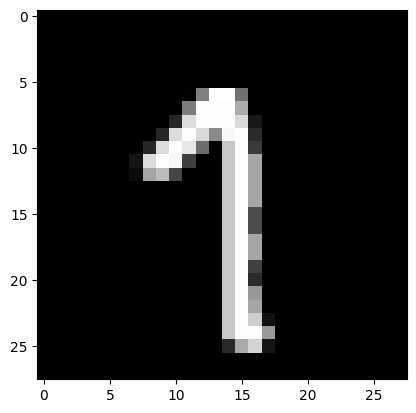

Prediction:  [5]
Label:  [5]


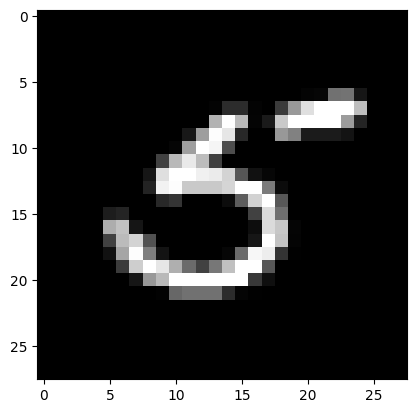

In [ ]:
test_prediction(69, w1 ,b1 ,w2 ,b2 ,w3 ,b3 )
test_prediction(81,  w1 ,b1 ,w2 ,b2 ,w3 ,b3 )
test_prediction(212, w1 ,b1 ,w2 ,b2 ,w3 ,b3 )
test_prediction(335, w1 ,b1 ,w2 ,b2 ,w3 ,b3 )

In [ ]:
test_predictions = make_predictions(X_test, w1 ,b1 ,w2 ,b2 ,w3 ,b3)
get_accuracy(test_predictions, y_test)

<ipython-input-24-9015e0b89a55>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.8009